In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px


# 2. Data Collection and Understanding

In [3]:
df = pd.read_csv('../data/marketing_campaign.csv', sep='\t')
# Check Null and Dtypes
print(df.dtypes)
print(df.info())

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns 

In [4]:
# define numerical & categorical columns
columns = [column for column in df.columns if column != "ID"]
numeric_features = [feature for feature in columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 25 numerical features : ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

We have 3 categorical features : ['Education', 'Marital_Status', 'Dt_Customer']


# 3. Data Cleaning

In [5]:
# Drop constant columns
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

# Recalculate numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns


# 4. Univariate Analysis

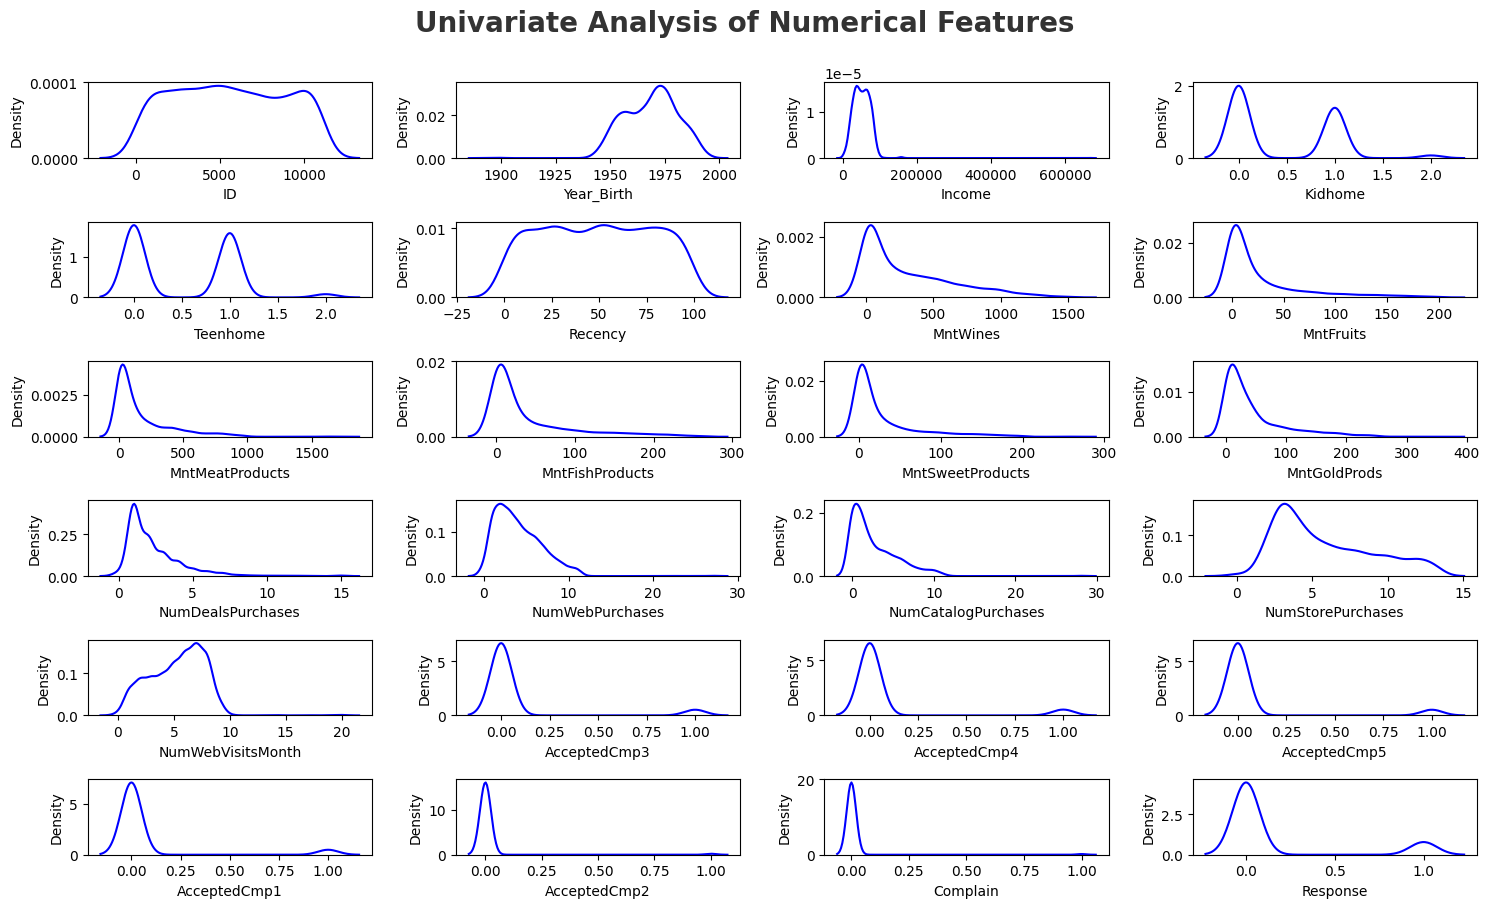

In [6]:
import seaborn as sns
# Univariate Analysis - Numeric features
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

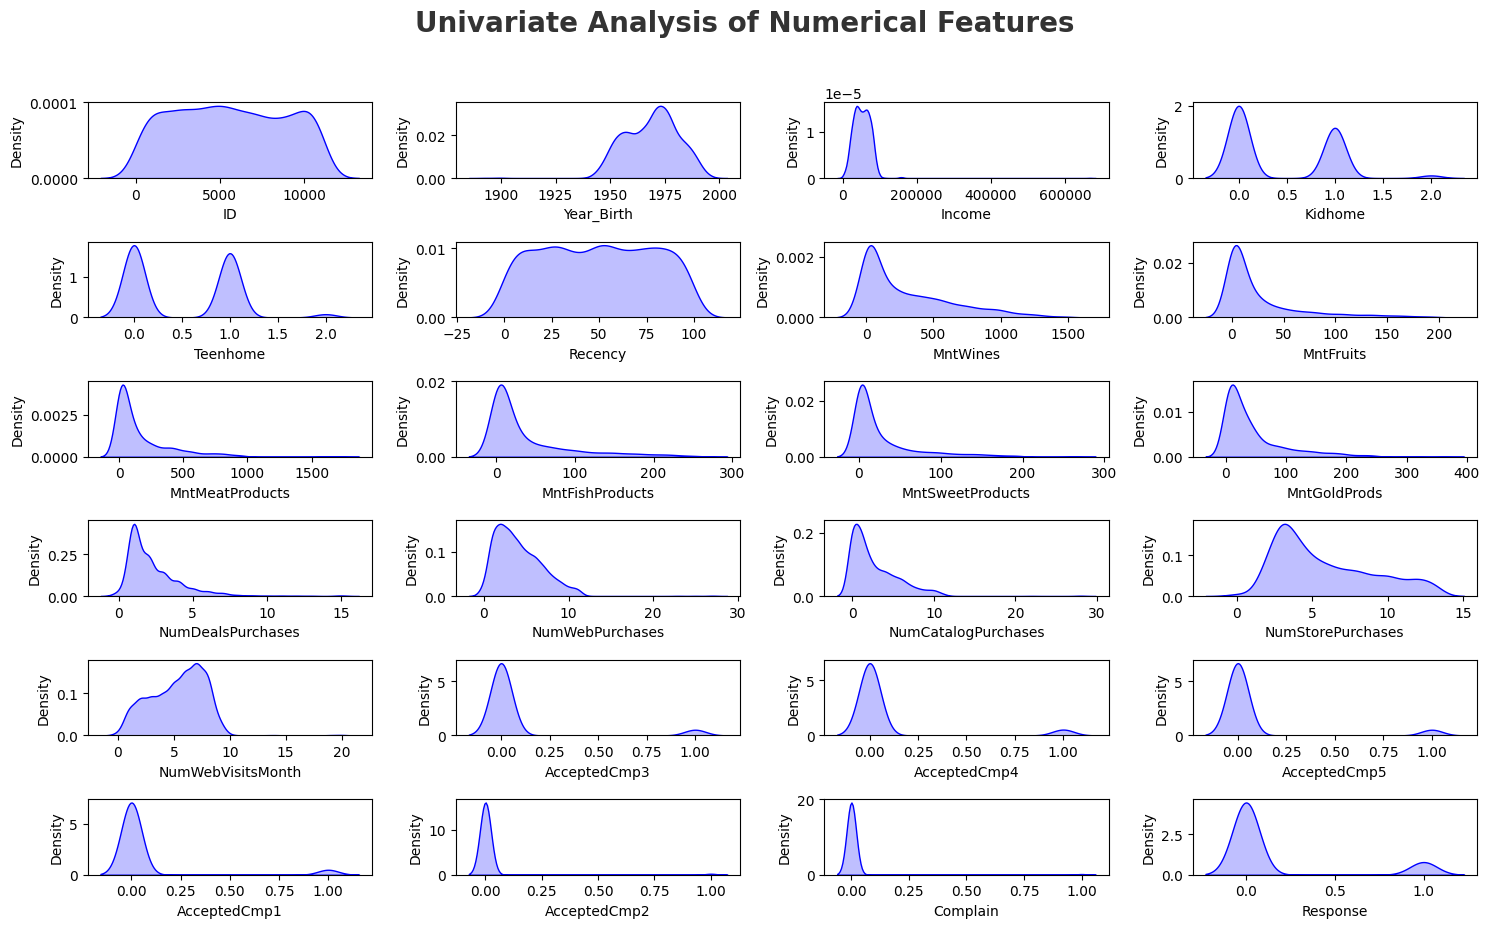

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.suptitle(
    'Univariate Analysis of Numerical Features',
    fontsize=20,
    fontweight='bold',
    alpha=0.8,
    y=1.02
)

for i, col in enumerate(numeric_features):
    plt.subplot(7, 4, i + 1)
    sns.kdeplot(df[col], fill=True, color='blue')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()


# 5. Categorical Analysis

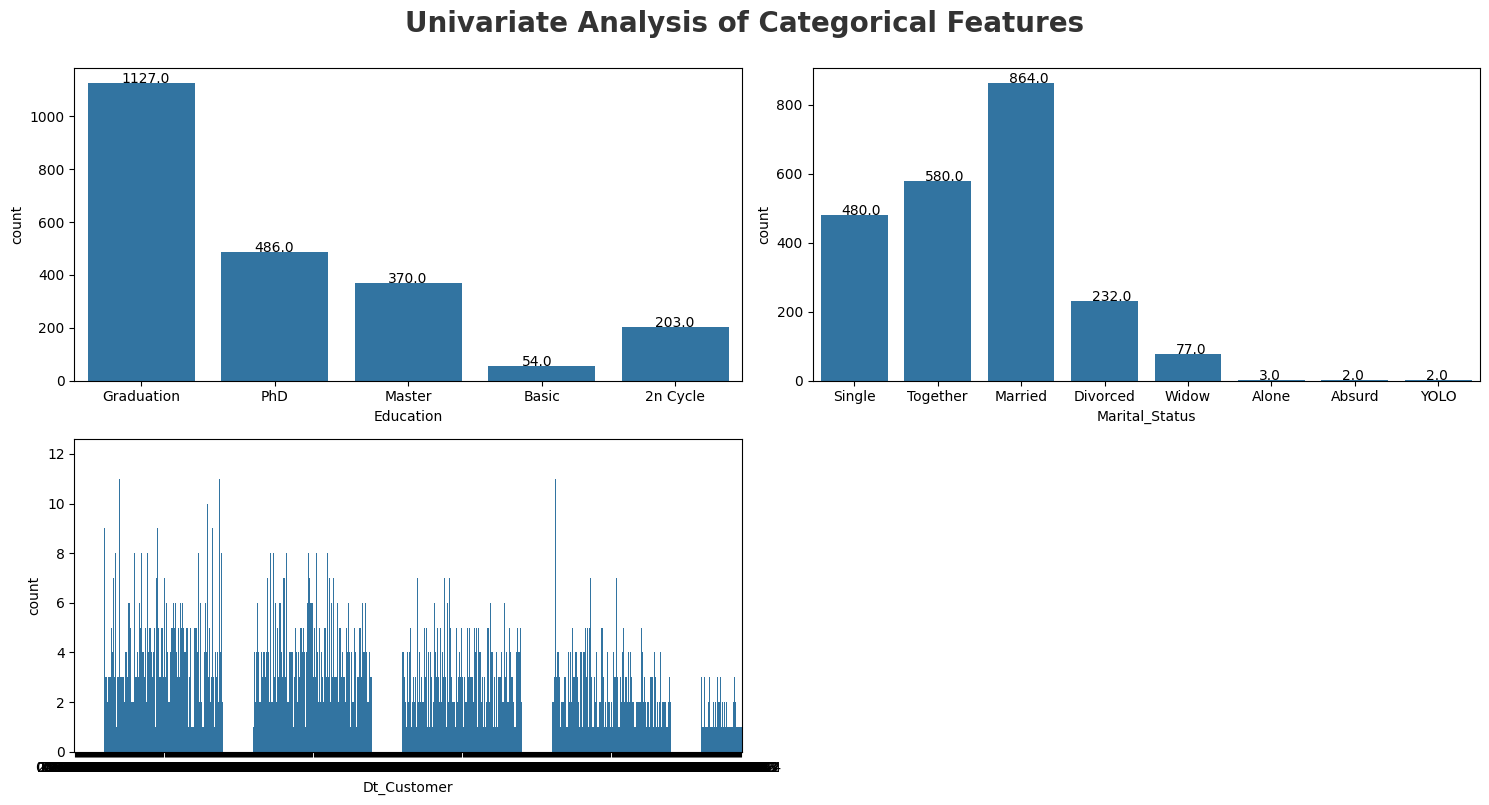

In [8]:
# Univariate Analysis - Categorical features
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=df[categorical_features[i]])
    if df[categorical_features[i]].value_counts().count() <10:
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# 6. Time-Based Analysis


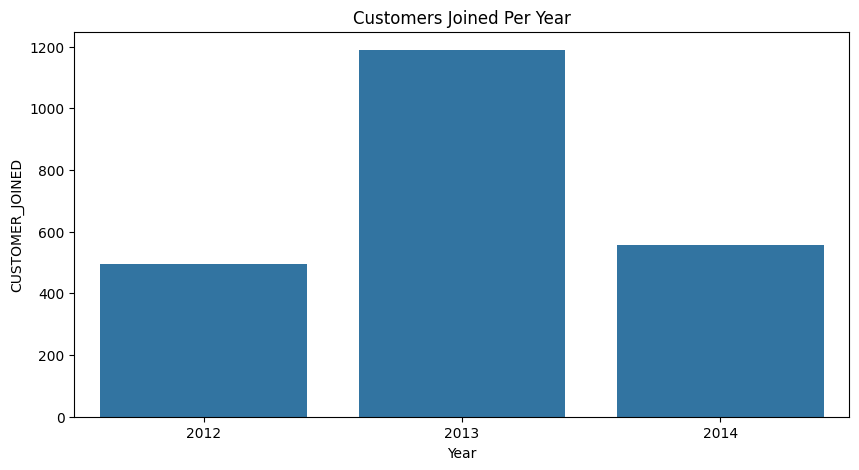

In [9]:
# Convert date
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

# Copy dataframe
df1 = df.copy()

# Extract year
df1["Year"] = df1["Dt_Customer"].dt.year

# Count customers per year
customer_joined_per_year = (
    df1.groupby("Year")["ID"]
    .count()
    .reset_index(name="CUSTOMER_JOINED")
)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=customer_joined_per_year, x="Year", y="CUSTOMER_JOINED")
plt.title("Customers Joined Per Year")
plt.show()


# 7. Multicollinearity Check

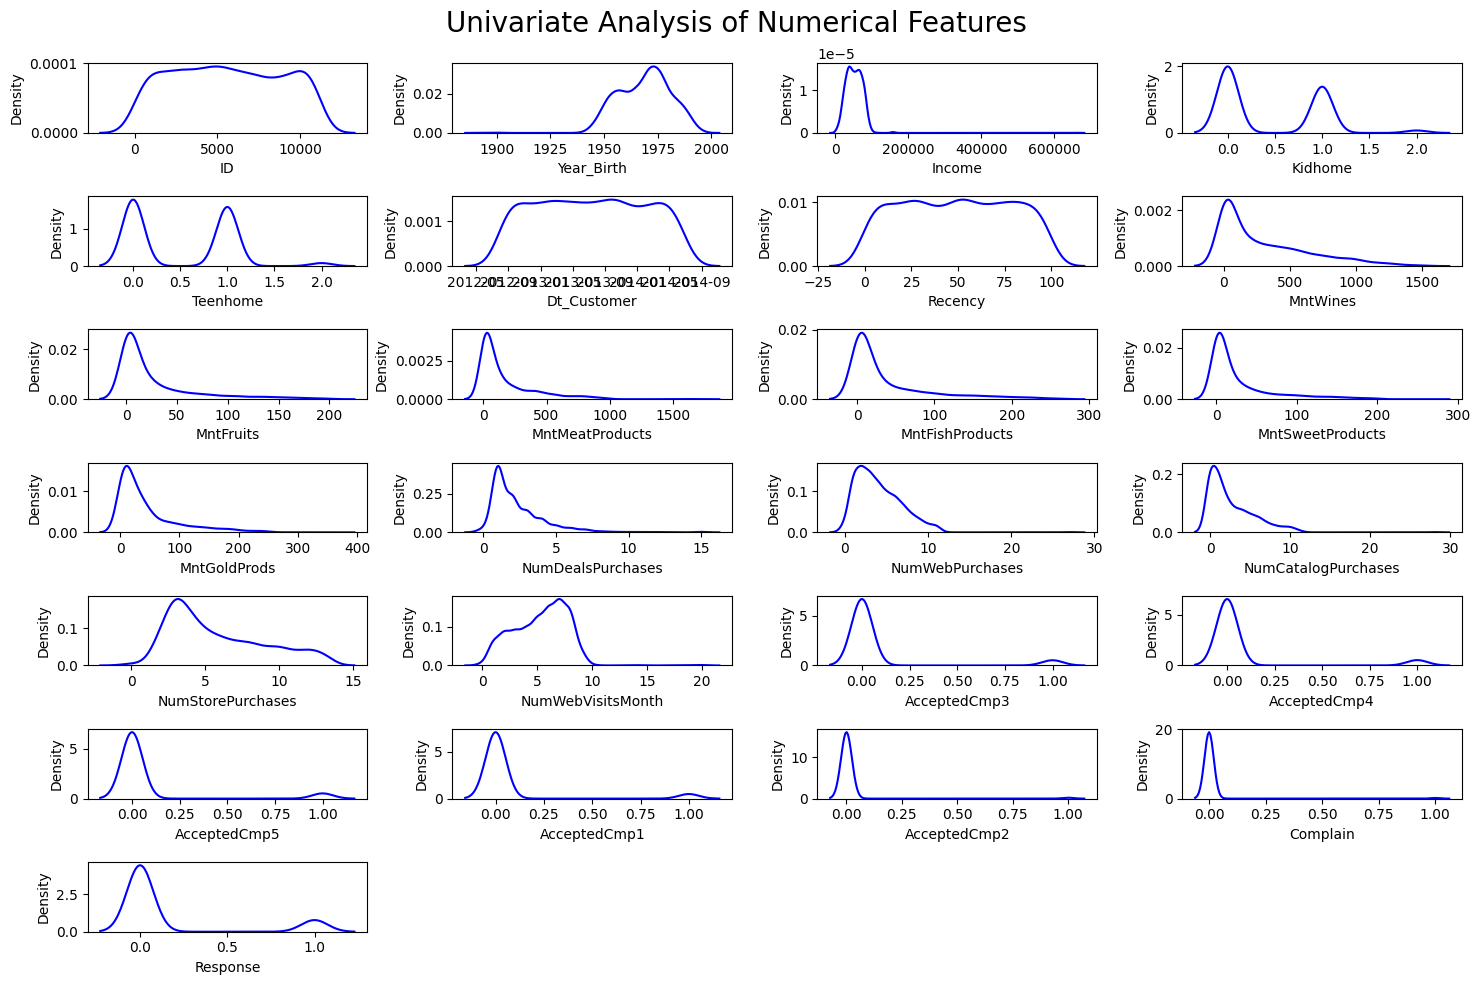

In [10]:
# Re-create numeric & categorical features AFTER cleaning
numeric_features = df.select_dtypes(exclude='object').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20)

for i, col in enumerate(numeric_features):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(df[col], color='blue')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


# 8. Handling Missing Values

In [11]:
# Filling missing values in the 'Income' column with median income
df['Income'].fillna(df['Income'].median(), inplace=True)

C:\Users\anuradha singh\AppData\Local\Temp\ipykernel_7796\1724502549.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


# 9. Visualization of Customer Attributes

### I. Customer's Age Distribution

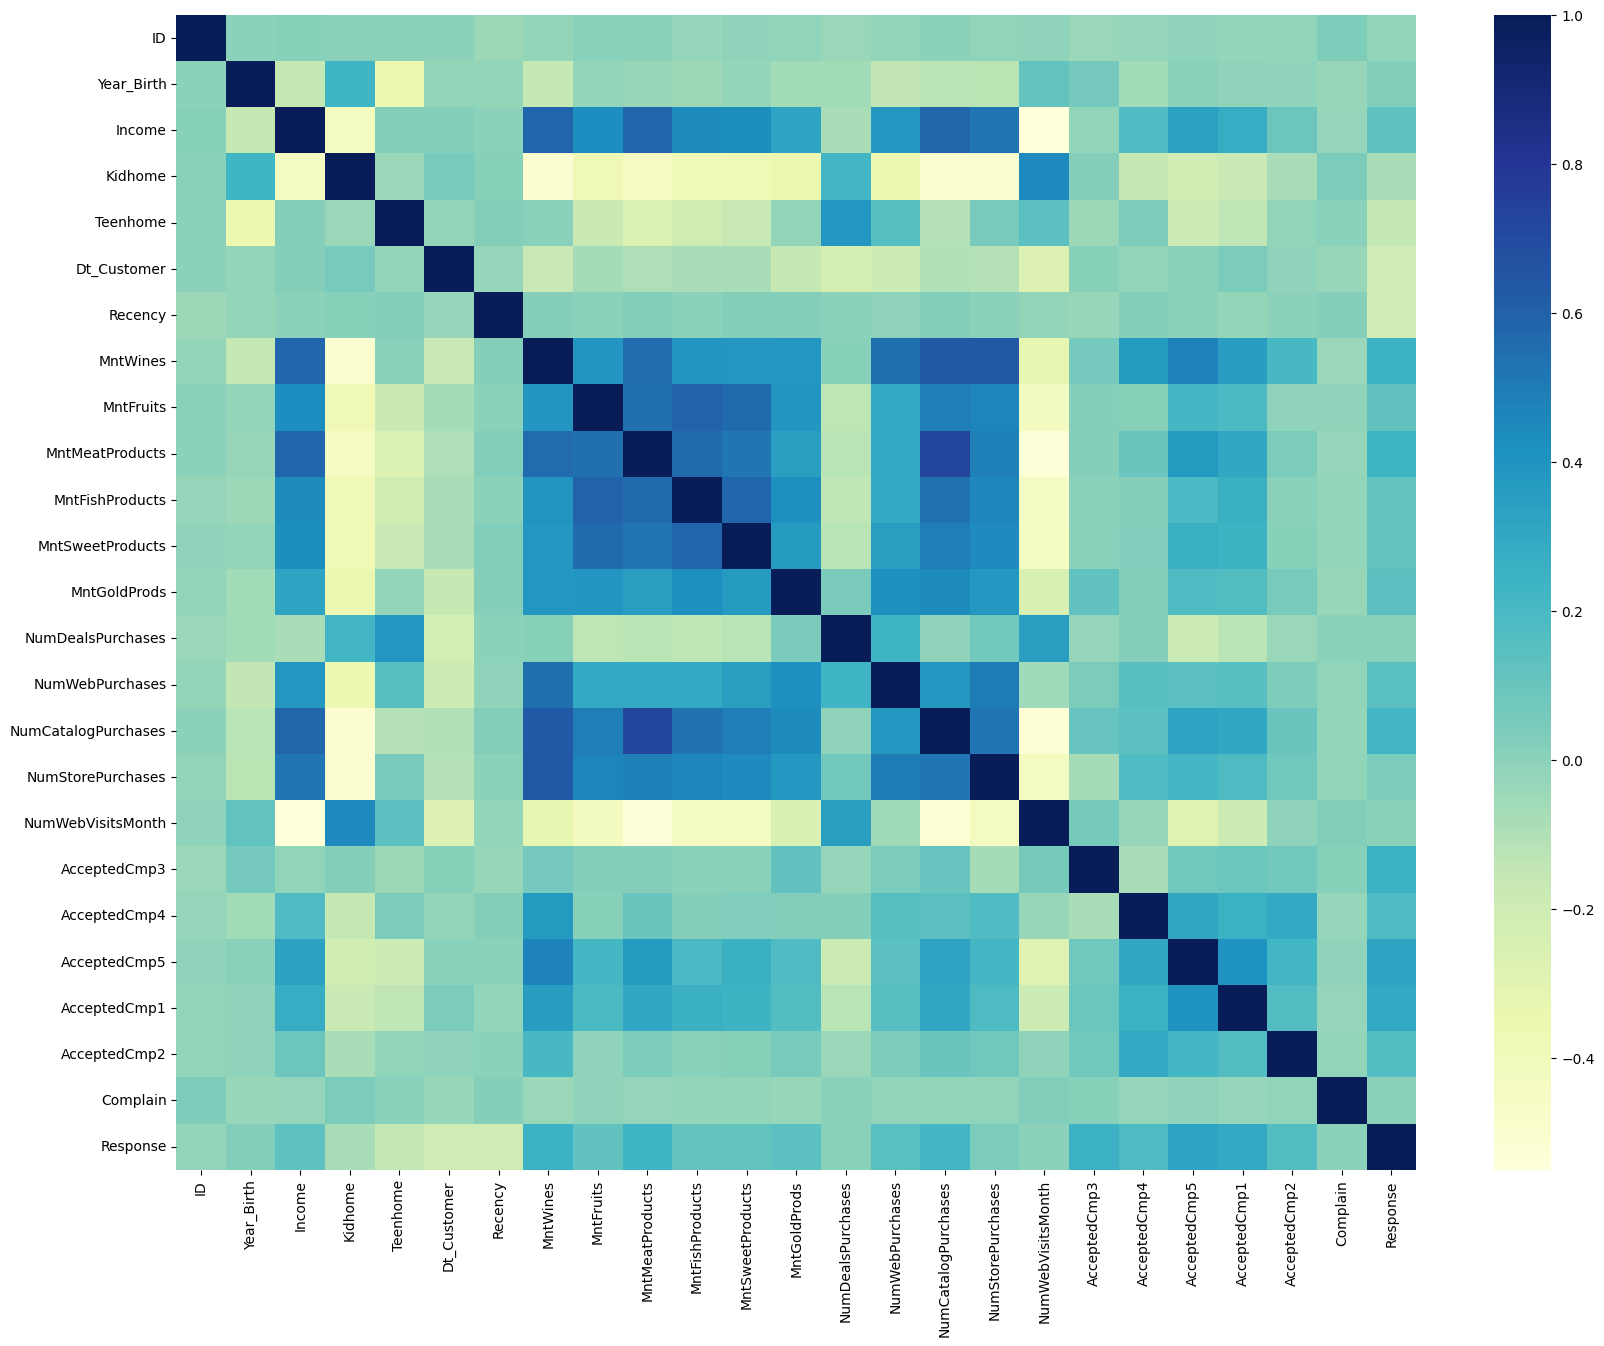

In [12]:
numeric_features = df.select_dtypes(exclude='object').columns.tolist()

# remove non-informative columns if present
for col in ['Z_CostContact', 'Z_Revenue']:
    if col in numeric_features:
        numeric_features.remove(col)

plt.figure(figsize=(20, 15))
sns.heatmap(df[numeric_features].corr(), cmap="YlGnBu")
plt.show()


### II. Customer's Income-Spending Distribution

In [13]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [14]:
spending_cols = [
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds"
]

df["Total_Spending"] = df[spending_cols].sum(axis=1)


Let's have a look on the distribution of customer's income and spending:


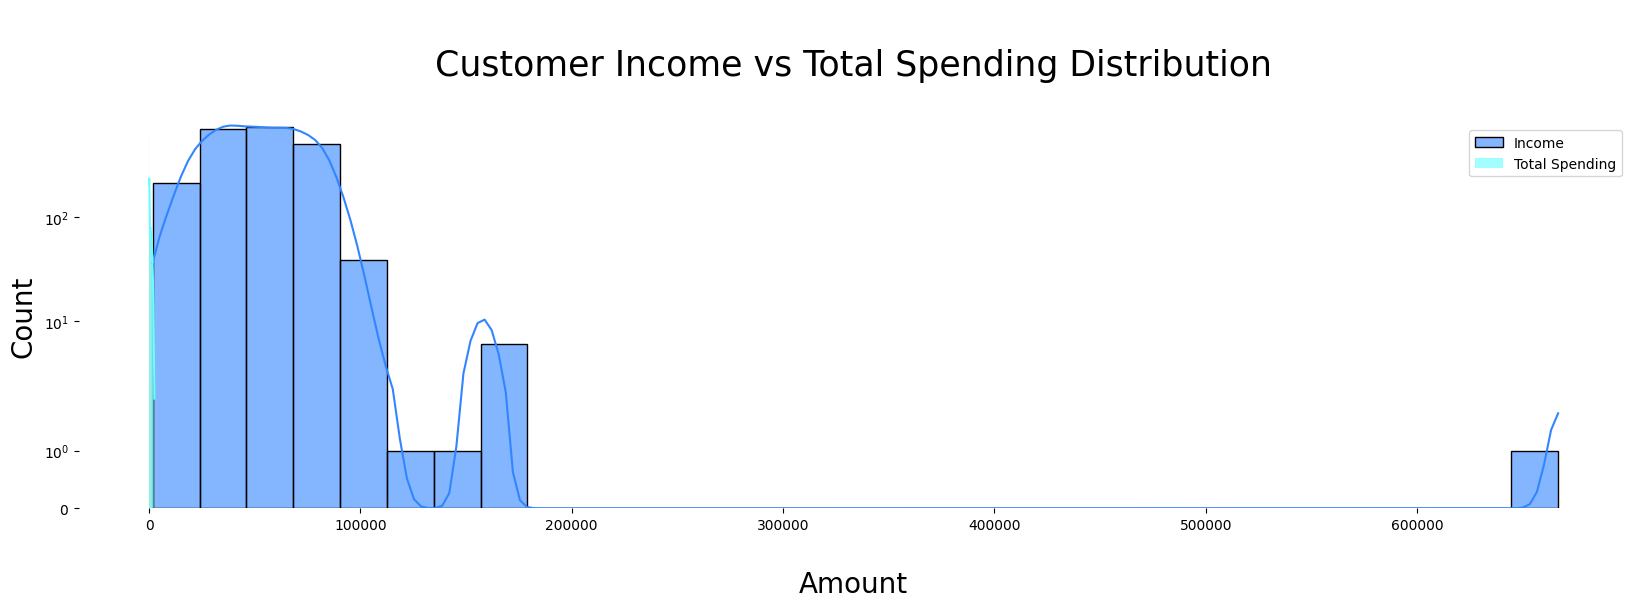

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Let's have a look on the distribution of customer's income and spending:")

plt.figure(figsize=(20, 5))

# Income distribution
sns.histplot(
    df["Income"],
    color="#3385ff",
    kde=True,
    bins=30,
    alpha=0.6,
    label="Income"
)

# Total Spending distribution
sns.histplot(
    df["Total_Spending"],
    color="#66ffff",
    kde=True,
    bins=30,
    alpha=0.6,
    label="Total Spending"
)

plt.yscale("symlog")
plt.title("\nCustomer Income vs Total Spending Distribution\n", fontsize=25)
plt.xlabel("\nAmount", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.legend()
sns.despine(left=True, bottom=True)

plt.show()


### III. Customer's Income-Spending Distribution

In [16]:
from datetime import datetime

current_year = datetime.now().year
df["Age"] = current_year - df["Year_Birth"]

spending_cols = [
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds"
]

df["Total_Spending"] = df[spending_cols].sum(axis=1)


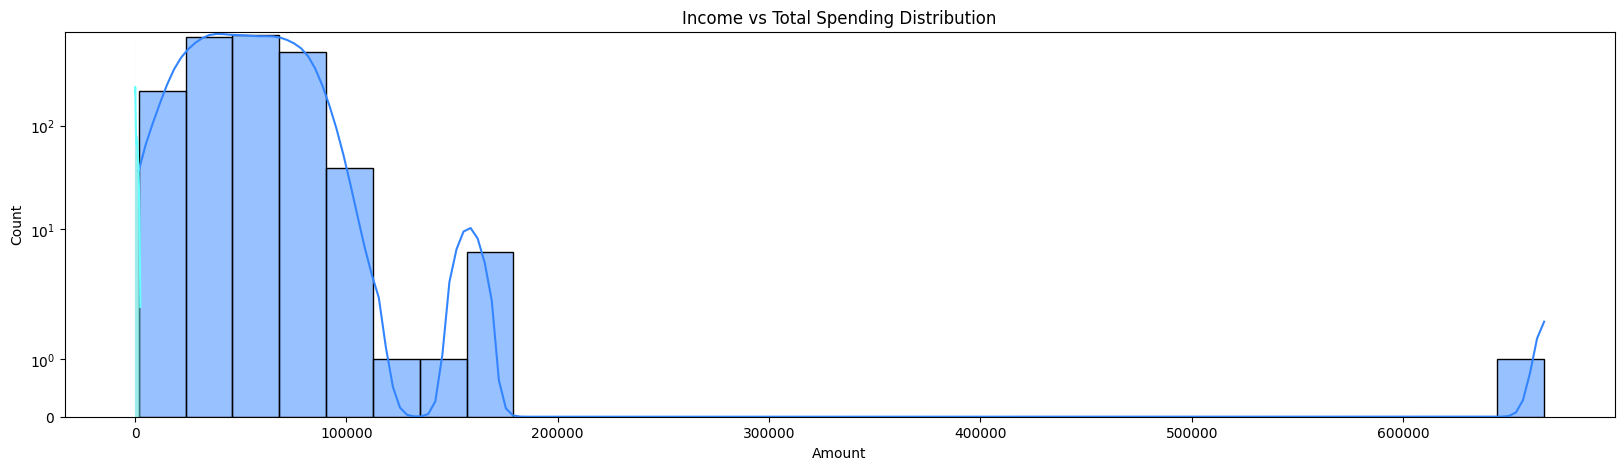

In [17]:
plt.figure(figsize=(20,5))

sns.histplot(df["Income"], color="#3385ff", kde=True, bins=30)
sns.histplot(df["Total_Spending"], color="#66ffff", kde=True, bins=30)

plt.yscale("symlog")
plt.title("Income vs Total Spending Distribution")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()



In [18]:
# Convert to datetime safely
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

# Create Age
df["Age"] = 2024 - df["Year_Birth"]
df[["Income", "Total_Spending", "Age","Recency"]].head()


,Income,Total_Spending,Age,Recency
0,58138.0,1617,67,58
1,46344.0,27,70,38
2,71613.0,776,59,26
3,26646.0,53,40,26
4,58293.0,422,43,94
